<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов" data-toc-modified-id="Отток-клиентов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Отток клиентов</a></span></li><li><span><a href="#1.-Подготовка-данных" data-toc-modified-id="1.-Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#2.-Исследование-задачи" data-toc-modified-id="2.-Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2. Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#3.-Борьба-с-дисбалансом" data-toc-modified-id="3.-Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3. Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Balanced-classes" data-toc-modified-id="Balanced-classes-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Balanced classes</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#4.-Тестирование-модели" data-toc-modified-id="4.-Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>4. Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Нужно довести метрику до 0.59.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Подготовка данных

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [221]:
data = pd.read_csv('/datasets/Churn.csv')

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [223]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Столбец `RowNumber` является лишним, так как обозначает номер строки, как и индексы, поэтому его можно удалить. Так же столбцы `CustomerId` и `Surname` тоже следует удалить, так как они могут оказать влияние на обучение моделей, хотя по идее вляения оказывать не должны.

In [224]:
df = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Так как столбцы `Geography` и `Gender` категориальные и не порядковые, то необходимо преобразовать их в численные техникой прямого кодирования.

In [225]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Были созданы фиктивные признаки `Geography_Germany, Geography_Spain и Gender_Male`, таким образом нулевые значения в первых двух означают, что клиент из Франции, а в последнем, что клиент является женщиной.

В столбце `Tenure` присутствуют пропуски, поэтому их необходимо заполнить. Заполнять будем, исходя из соображения, что отсутствующие значения не должны повлиять на распределение. Поэтому построим столбчантые диаграммы, заполним пустые ячейки случайными числами и сравним распределения.

Text(0, 0.5, 'Количество клиентов, шт.')

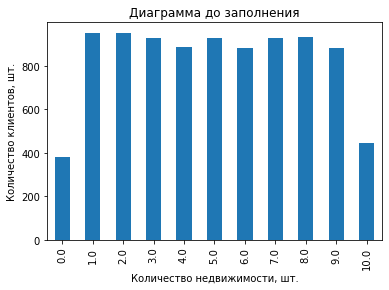

In [226]:
ten_prev = (df['Tenure']
            .value_counts()
            .sort_index()
            )
ten_prev.plot(kind='bar')
plt.title('Диаграмма до заполнения')
plt.xlabel('Количество недвижимости, шт.')
plt.ylabel('Количество клиентов, шт.')

Text(0, 0.5, 'Количество клиентов, шт.')

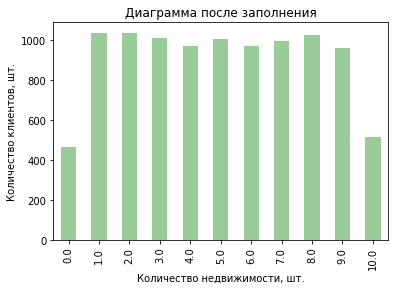

In [227]:
def random_tenure(value):
    if value != value:
        return np.random.randint(0, 11)
    return value

df['Tenure'] = df['Tenure'].apply(random_tenure)

ten_aft = (df['Tenure']
           .value_counts()
           .sort_index()
           )
ten_aft.plot(kind='bar', color='green', alpha=0.4)
plt.title('Диаграмма после заполнения')
plt.xlabel('Количество недвижимости, шт.')
plt.ylabel('Количество клиентов, шт.')

Text(0, 0.5, 'Количество клиентов, шт.')

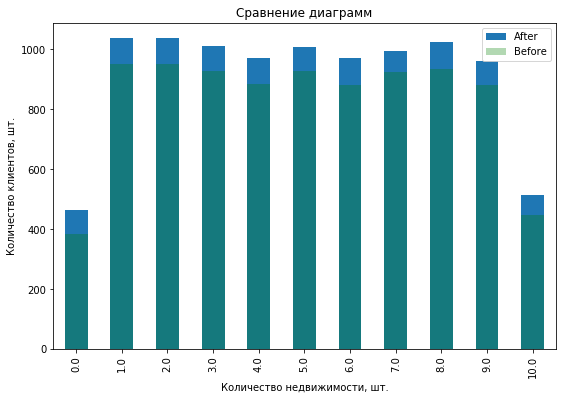

In [228]:
ax = ten_aft.plot(kind='bar', label='After', legend=True)
ten_prev.plot(kind='bar', label='Before', figsize=(9,6), legend=True, ax=ax, color='green', alpha=0.3)
plt.title('Сравнение диаграмм')
plt.xlabel('Количество недвижимости, шт.')
plt.ylabel('Количество клиентов, шт.')

Распределение не изменилось, а значит пропуски заполнены корректно.

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null float64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


### Вывод

Данные обработаны, перейдем к исследованию задачи.

# 2. Исследование задачи

Выделим признаки и целевой признак в отдельные переменные.

In [230]:
target = df['Exited']
features = df.drop(['Exited'], axis=1)
target.value_counts()/len(target)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Классы не сбалансированы и представлены в соотношении 80 к 20, где 20% - это ушедшие клиены, а 80 - оставшиеся.

Выделим тренировочную выборку, содержащую 60% всех данных.

In [231]:
features_train, features_tv, target_train, target_tv = train_test_split(
    features, target, test_size=0.4, random_state=123, stratify=target)
print(features_train.shape)
print(target_train.shape)
print(features_tv.shape)
print(target_tv.shape)

(6000, 11)
(6000,)
(4000, 11)
(4000,)


Разделим оставшиеся данные пополам, так на валидационную и тестовую выборки будет выделено по 20% от всех данных.

In [232]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_tv, target_tv, test_size=0.5, random_state=123, stratify=target_tv)
print(target_valid.shape)
print(target_test.shape)

(2000,)
(2000,)


Выполним масштабирование данных тренировочной и валидационной выборок, предварительно обучив StandardScaler на тренировочных данных.

In [233]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = pd.DataFrame(scaler.transform(features_train[numeric]), index=target_train.index)
features_valid[numeric] = pd.DataFrame(scaler.transform(features_valid[numeric]), index=target_valid.index)
features_test[numeric] = pd.DataFrame(scaler.transform(features_test[numeric]), index=target_test.index)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [234]:
features.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0


In [235]:
features_train.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6255,-1.081763,1.561078,1.384936,0.567612,2.552230,1,0,-1.444757,1,0,1
7141,1.083241,-0.091611,-1.366478,0.097622,-0.926107,0,1,-1.559126,1,0,0
3824,0.167278,0.491691,0.009229,0.751314,-0.926107,0,0,-1.476028,0,0,1


Обучим модель логистической регрессии и получим значение метрики F1.

In [236]:
model = LogisticRegression(random_state=123, solver='liblinear')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
f1_score(target_valid, predictions)

0.29893238434163705

Значение F1-меры мало, это означает, что модель плохо выявляет нужный класс. Необходимо разобраться с чем конкретно проблема у данной модели. Подсчитаем ***точность***

In [237]:
precision_score(target_valid, predictions)

0.5454545454545454

Такое значение точности говорит о том, что модель выявила примерно столько же ложноположительных ответов **FP** как и истиноположительных **TP**.

Найдем значение ***полноты***

In [238]:
recall_score(target_valid, predictions)

0.20588235294117646

Токое значение полноты говорит о том, что количество ложноотрицательных ответов **FN** значительно выше количества истиноположительных **TP**.

Получим матрицу соответствия, чтобы подтвердить свои выводы. Вертикальная ось -  это правильные ответы, а горизонтальная - предсказания.

In [239]:
confusion_matrix(target_valid, predictions)

array([[1522,   70],
       [ 324,   84]])

Матрица подтверждает выводы сделаные выше, что количество FN ответов существенно превышает TP ответы.

Подсчитаем значение ROC_AUC и построим кривую в сравнении со случайной моделью.

In [240]:
probabilites_valid = model.predict_proba(features_valid)
probabilites_one_valid = probabilites_valid[:, 1]
roc_auc_score(target_valid, probabilites_one_valid)

0.7321857449009755

Text(0.5, 1.0, 'ROC-кривая')

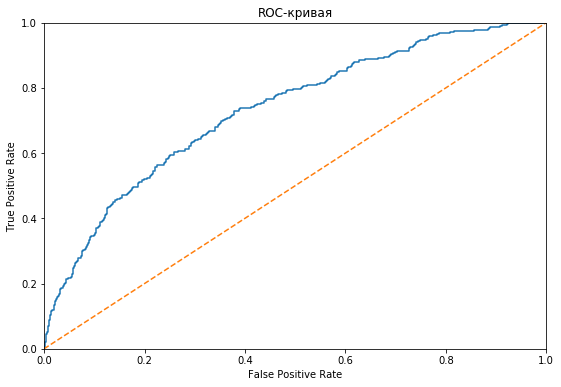

In [241]:
fpr, tpr, threshholds = roc_curve(target_valid, probabilites_one_valid)
plt.figure(figsize=(9, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

Модель логистической регрессии работает лучше случайной модели. В следующем разделе необходимо поднять метрику ROC-AUC выше 0.74.

### Вывод

Несмотря на то, что по метрике ROC-AUC модель показывает неплохие на первый взгляд результаты, но F1-мера мала и ее требуется повысить. Воспользуемся методами увеличения и понижения количества объектов преобладающего класса для больры с дисбалансом при обучении модели. Это должно помочь повысить F1.

# 3. Борьба с дисбалансом

### Upsampling

Для сбалансирования классов воспользуемся методом **upsampling** и для начала подсчитаем во сколько раз нужно увеличить количество объектов в классе "1".

In [242]:
repeat = round(target[target == 0].count() / target[target == 1].count())
print('Во сколько раз увеличить класс "1":', repeat)

Во сколько раз увеличить класс "1": 4


Необходимо написать функцию, которая увеличит класс "1".

In [243]:
def upsampling(features, target, repeat):
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    features_up = pd.concat([features_zero] + [features_one] * repeat)
    target_up = pd.concat([target_zero] + [target_one] * repeat)
    features_up, target_up = shuffle(features_up, target_up, random_state=123)
    return features_up, target_up

In [244]:
features_train_up, target_up = upsampling(features_train, target_train, repeat)
print(features_train.shape)
print(features_train_up.shape)

(6000, 11)
(9666, 11)


Класс был успешно увеличен.

Далее обучим **DecisionTree**.

In [245]:
roc_best = 0
for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=123)
    tree.fit(features_train_up, target_up)
    predictions = tree.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    
    probabilites_valid = tree.predict_proba(features_valid)
    probabilites_one_valid = probabilites_valid[:, 1]
    roc = roc_auc_score(target_valid, probabilites_one_valid)
    if roc > roc_best:
        tree_best = tree
        f1_best = f1
        depth_best = depth
        roc_best = roc
        predictions_best = predictions
print('Лучшее дерево имеет глубину {} и метрика ROC-AUC равна {:.3f}'.format(depth_best, roc_best))
print('F1-мера: {:.3f}'.format(f1_best))
precision = precision_score(target_valid, predictions_best)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions_best)
print('Полнота: {:.3f}'.format(recall))

Лучшее дерево имеет глубину 5 и метрика ROC-AUC равна 0.834
F1-мера: 0.551
Точность: 0.422
Полнота: 0.792


In [246]:
t = pd.Series(data=['DecisionTree', recall, precision, f1_best, roc_best])
t = {'name': 'DecisionTree',
     'recall': recall,
     'precision': precision,
     'f1': f1_best,
     'roc-auc': roc_best}
t

{'name': 'DecisionTree',
 'recall': 0.7916666666666666,
 'precision': 0.4222222222222222,
 'f1': 0.5507246376811594,
 'roc-auc': 0.8337759569908365}

**RandomForest**

In [247]:
roc_best = 0
for depth in range(1, 11):
    for est in range(10, 100, 10):
        rf_model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=123)
        rf_model.fit(features_train_up, target_up)
        predictions = rf_model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)

        probabilites_valid = rf_model.predict_proba(features_valid)
        probabilites_one_valid = probabilites_valid[:, 1]
        roc = roc_auc_score(target_valid, probabilites_one_valid)
        if roc > roc_best:
            rf_model_best = rf_model
            f1_best = f1
            depth_best = depth
            roc_best = roc
            est_best = est
            predictions_best = predictions
print('Лучший лес имеет число деревьев равное {} глубиной {} и метрика ROC-AUC равна {:.3f}'.format(est, depth_best, roc_best))
print('F1-мера: {:.3f}'.format(f1_best))
precision = precision_score(target_valid, predictions_best)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions_best)
print('Полнота: {:.3f}'.format(recall))

Лучший лес имеет число деревьев равное 90 глубиной 10 и метрика ROC-AUC равна 0.850
F1-мера: 0.602
Точность: 0.548
Полнота: 0.667


In [248]:
f = pd.Series(data=['RandomForest', recall, precision, f1_best, roc_best])
f = {'name': 'RandomForest',
     'recall': recall,
     'precision': precision,
     'f1': f1_best,
     'roc-auc': roc_best}
f

{'name': 'RandomForest',
 'recall': 0.6666666666666666,
 'precision': 0.5483870967741935,
 'f1': 0.6017699115044248,
 'roc-auc': 0.8499575081288797}

**LogisticRegression**

In [249]:
lr_model = LogisticRegression(random_state=123, solver='liblinear')
lr_model.fit(features_train_up, target_up)
predictions = lr_model.predict(features_valid)
f1 = f1_score(target_valid, predictions)
probabilites_valid = lr_model.predict_proba(features_valid)
probabilites_one_valid = probabilites_valid[:, 1]
roc = roc_auc_score(target_valid, probabilites_one_valid)
print('Лучшая логистическая регрессия имеет метрику ROC-AUC равную {:.3f}'.format(roc))
print('F1-мера: {:.3f}'.format(f1))
precision = precision_score(target_valid, predictions)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions)
print('Полнота: {:.3f}'.format(recall))

Лучшая логистическая регрессия имеет метрику ROC-AUC равную 0.735
F1-мера: 0.461
Точность: 0.357
Полнота: 0.652


In [250]:
l = {'name': 'LogisticRegression',
     'recall': recall,
     'precision': precision,
     'f1': f1,
     'roc-auc': roc}
l

{'name': 'LogisticRegression',
 'recall': 0.6519607843137255,
 'precision': 0.35704697986577183,
 'f1': 0.46140503035559405,
 'roc-auc': 0.7347983791506552}

Определим порог для максимизации F1.

In [251]:
forest = RandomForestClassifier(n_estimators=90, max_depth=10, random_state=123)
forest.fit(features_train_up, target_up)
f1_best = 0

probabilites_valid = forest.predict_proba(features_valid)
probabilites_one_valid = probabilites_valid[:, 1]
roc = roc_auc_score(target_valid, probabilites_one_valid)
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilites_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        threshold_best_up = threshold
        f1_best = f1
    print("Порог = {:.2f} | F1 = {:.3f} | Точность = {:.3f} | Полнота = {:.3f}".format(threshold, f1, precision, recall))
print()
print('Лучший порог: {:.2f}'.format(threshold_best_up))
print('Лучшая F1-мера: {:.3f}'.format(f1_best))

Порог = 0.00 | F1 = 0.339 | Точность = 0.204 | Полнота = 1.000
Порог = 0.05 | F1 = 0.345 | Точность = 0.209 | Полнота = 1.000
Порог = 0.10 | F1 = 0.384 | Точность = 0.238 | Полнота = 0.995
Порог = 0.15 | F1 = 0.416 | Точность = 0.264 | Полнота = 0.973
Порог = 0.20 | F1 = 0.451 | Точность = 0.295 | Полнота = 0.956
Порог = 0.25 | F1 = 0.485 | Точность = 0.331 | Полнота = 0.909
Порог = 0.30 | F1 = 0.505 | Точность = 0.361 | Полнота = 0.838
Порог = 0.35 | F1 = 0.536 | Точность = 0.403 | Полнота = 0.799
Порог = 0.40 | F1 = 0.564 | Точность = 0.449 | Полнота = 0.757
Порог = 0.45 | F1 = 0.589 | Точность = 0.501 | Полнота = 0.716
Порог = 0.50 | F1 = 0.602 | Точность = 0.548 | Полнота = 0.667
Порог = 0.55 | F1 = 0.601 | Точность = 0.590 | Полнота = 0.613
Порог = 0.60 | F1 = 0.599 | Точность = 0.646 | Полнота = 0.559
Порог = 0.65 | F1 = 0.589 | Точность = 0.708 | Полнота = 0.505
Порог = 0.70 | F1 = 0.551 | Точность = 0.735 | Полнота = 0.441
Порог = 0.75 | F1 = 0.499 | Точность = 0.777 | Полнота 

Лучшей моделью оказался случайный лес с параметрами `n_estimators=90, max_depth=10` и порогом `0.6`. При таких параметрах `ROC = 0.851`, а `F1 = 0.606` 

In [252]:
columns = ['name', 'recall', 'precision', 'f1', 'roc-auc']
upsampled_models = pd.DataFrame(columns=columns, data=[t, f, l])
upsampled_models

,name,recall,precision,f1,roc-auc
0,DecisionTree,0.791667,0.422222,0.550725,0.833776
1,RandomForest,0.666667,0.548387,0.601770,0.849958
2,LogisticRegression,0.651961,0.357047,0.461405,0.734798


In [253]:
upsampled_models['balance_method'] = 'Upsampling'
upsampled_models

,name,recall,precision,f1,roc-auc,balance_method
0,DecisionTree,0.791667,0.422222,0.550725,0.833776,Upsampling
1,RandomForest,0.666667,0.548387,0.601770,0.849958,Upsampling
2,LogisticRegression,0.651961,0.357047,0.461405,0.734798,Upsampling


Теперь воспользуемся **downsampling**.

Сбалансируем классы, отбросив часть данных из преобладающего класса ("0"). Для начала выясним какая объектов должна сохраниться от изначального количества данных в данном классе.

In [254]:
ratio = target.value_counts()/len(target)
fraction = round(ratio[1] / ratio[0], 1)
print('Доля оставшихся объектов класс "0":', fraction)

Доля оставшихся объектов класс "0": 0.3


Разделим обучающую выборку по классам, поотом случайным образом отбросим часть объектов из класса "0", объединим классы в одну таблицу и перемешаем. Все это запишем внутри функции.

In [255]:
def downsamle(features, target, fraction):
    features_zero = features[target_train == 0]
    features_one = features[target_train == 1]
    target_zero = target[target_train == 0]
    target_one = target[target_train == 1]
    
    features_downsamled = pd.concat(
        [features_zero.sample(frac=fraction, random_state=123)] + [features_one])
    target_downsampled = pd.concat(
        [target_zero.sample(frac=fraction, random_state=123)] + [target_one])
    
    features_downsamled, target_downsampled = shuffle(
        features_downsamled, target_downsampled, random_state=123)
    return features_downsamled, target_downsampled

In [256]:
features_down, target_down = downsamle(features_train, target_train, fraction)
print(features_down.shape, target_down.shape)

(2655, 11) (2655,)


Далее исследуем модели DecisionTree, RandomForest, LogisticRegression.

**DecisionTree**

In [257]:
roc_best = 0
for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=123)
    tree.fit(features_down, target_down)
    predictions = tree.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    
    probabilites_valid = tree.predict_proba(features_valid)
    probabilites_one_valid = probabilites_valid[:, 1]
    roc = roc_auc_score(target_valid, probabilites_one_valid)
    if roc > roc_best:
        tree_best = tree
        f1_best = f1
        depth_best = depth
        roc_best = roc
        predictions_best = predictions
print('Лучшее дерево имеет глубину {} и метрика ROC-AUC равна {:.3f}'.format(depth_best, roc_best))
print('F1-мера: {:.3f}'.format(f1_best))
precision = precision_score(target_valid, predictions_best)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions_best)
print('Полнота: {:.3f}'.format(recall))

Лучшее дерево имеет глубину 5 и метрика ROC-AUC равна 0.838
F1-мера: 0.565
Точность: 0.465
Полнота: 0.718


In [258]:
t = pd.Series(data=['DecisionTree', recall, precision, f1_best, roc_best])
t = {'name': 'DecisionTree',
     'recall': recall,
     'precision': precision,
     'f1': f1_best,
     'roc-auc': roc_best}
t

{'name': 'DecisionTree',
 'recall': 0.7181372549019608,
 'precision': 0.4650793650793651,
 'f1': 0.5645472061657033,
 'roc-auc': 0.8380228347620455}

**RandomForest**

In [259]:
roc_best = 0
for depth in range(1, 11):
    for est in range(10, 100, 10):
        rf_model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=123)
        rf_model.fit(features_down, target_down)
        predictions = rf_model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)

        probabilites_valid = rf_model.predict_proba(features_valid)
        probabilites_one_valid = probabilites_valid[:, 1]
        roc = roc_auc_score(target_valid, probabilites_one_valid)
        if roc > roc_best:
            rf_model_best = rf_model
            f1_best = f1
            depth_best = depth
            roc_best = roc
            est_best = est
            predictions_best = predictions
print('Лучший лес имеет число деревьев равное {} глубиной {} и метрика ROC-AUC равна {:.3f}'.format(est, depth_best, roc_best))
print('F1-мера: {:.3f}'.format(f1_best))
precision = precision_score(target_valid, predictions_best)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions_best)
print('Полнота: {:.3f}'.format(recall))

Лучший лес имеет число деревьев равное 90 глубиной 7 и метрика ROC-AUC равна 0.845
F1-мера: 0.587
Точность: 0.512
Полнота: 0.689


In [260]:
f = pd.Series(data=['RandomForest', recall, precision, f1_best, roc_best])
f = {'name': 'RandomForest',
     'recall': recall,
     'precision': precision,
     'f1': f1_best,
     'roc-auc': roc_best}
f

{'name': 'RandomForest',
 'recall': 0.6887254901960784,
 'precision': 0.51183970856102,
 'f1': 0.587251828631139,
 'roc-auc': 0.8449277638190954}

**LogisticRegression**

In [261]:
lr_model = LogisticRegression(random_state=123, solver='liblinear')
lr_model.fit(features_down, target_down)
predictions = lr_model.predict(features_valid)
f1 = f1_score(target_valid, predictions)
probabilites_valid = lr_model.predict_proba(features_valid)
probabilites_one_valid = probabilites_valid[:, 1]
roc = roc_auc_score(target_valid, probabilites_one_valid)
print('Лучшая логистическая регрессия имеет метрику ROC-AUC равную {:.3f}'.format(roc))
print('F1-мера: {:.3f}'.format(f1))
precision = precision_score(target_valid, predictions)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions)
print('Полнота: {:.3f}'.format(recall))

Лучшая логистическая регрессия имеет метрику ROC-AUC равную 0.735
F1-мера: 0.458
Точность: 0.374
Полнота: 0.588


In [262]:
l = {'name': 'LogisticRegression',
     'recall': recall,
     'precision': precision,
     'f1': f1,
     'roc-auc': roc}
l

{'name': 'LogisticRegression',
 'recall': 0.5882352941176471,
 'precision': 0.374414976599064,
 'f1': 0.45757864632983797,
 'roc-auc': 0.7345027835254705}

Определим порог для максимизации F1.

In [263]:
forest = RandomForestClassifier(n_estimators=90, max_depth=9, random_state=123)
forest.fit(features_down, target_down)
f1_best = 0

probabilites_valid = forest.predict_proba(features_valid)
probabilites_one_valid = probabilites_valid[:, 1]
roc = roc_auc_score(target_valid, probabilites_one_valid)
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilites_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        threshold_best_down = threshold
        f1_best = f1
    print("Порог = {:.2f} | F1 = {:.3f} | Точность = {:.3f} | Полнота = {:.3f}".format(threshold, f1, precision, recall))
print()
print('Лучший порог: {:.2f}'.format(threshold_best_down))
print('Лучшая F1-мера: {:.3f}'.format(f1_best))

Порог = 0.00 | F1 = 0.339 | Точность = 0.204 | Полнота = 1.000
Порог = 0.05 | F1 = 0.341 | Точность = 0.206 | Полнота = 1.000
Порог = 0.10 | F1 = 0.365 | Точность = 0.224 | Полнота = 0.998
Порог = 0.15 | F1 = 0.398 | Точность = 0.250 | Полнота = 0.983
Порог = 0.20 | F1 = 0.432 | Точность = 0.278 | Полнота = 0.971
Порог = 0.25 | F1 = 0.459 | Точность = 0.304 | Полнота = 0.936
Порог = 0.30 | F1 = 0.485 | Точность = 0.333 | Полнота = 0.892
Порог = 0.35 | F1 = 0.502 | Точность = 0.358 | Полнота = 0.838
Порог = 0.40 | F1 = 0.529 | Точность = 0.399 | Полнота = 0.782
Порог = 0.45 | F1 = 0.551 | Точность = 0.441 | Полнота = 0.735
Порог = 0.50 | F1 = 0.587 | Точность = 0.505 | Полнота = 0.701
Порог = 0.55 | F1 = 0.605 | Точность = 0.580 | Полнота = 0.632
Порог = 0.60 | F1 = 0.601 | Точность = 0.640 | Полнота = 0.566
Порог = 0.65 | F1 = 0.584 | Точность = 0.691 | Полнота = 0.505
Порог = 0.70 | F1 = 0.540 | Точность = 0.734 | Полнота = 0.426
Порог = 0.75 | F1 = 0.511 | Точность = 0.790 | Полнота 

Лучшей моделью оказался случайный лес с параметрами `n_estimators=90, max_depth=9` и порогом `0.55`. При таких параметрах `ROC = 0.844`, а `F1 = 0.598` 

In [264]:
columns = ['name', 'recall', 'precision', 'f1', 'roc-auc']
downsampled_models = pd.DataFrame(columns=columns, data=[t, f, l])
downsampled_models

,name,recall,precision,f1,roc-auc
0,DecisionTree,0.718137,0.465079,0.564547,0.838023
1,RandomForest,0.688725,0.511840,0.587252,0.844928
2,LogisticRegression,0.588235,0.374415,0.457579,0.734503


In [265]:
downsampled_models['balance_method'] = 'Downsampling'
downsampled_models

,name,recall,precision,f1,roc-auc,balance_method
0,DecisionTree,0.718137,0.465079,0.564547,0.838023,Downsampling
1,RandomForest,0.688725,0.511840,0.587252,0.844928,Downsampling
2,LogisticRegression,0.588235,0.374415,0.457579,0.734503,Downsampling


### Balanced classes

Теперь воспользуемся **балансировкой классов**.

**DecisionTree**

In [266]:
roc_best = 0
for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=123, class_weight='balanced')
    tree.fit(features_train, target_train)
    predictions = tree.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    
    probabilites_valid = tree.predict_proba(features_valid)
    probabilites_one_valid = probabilites_valid[:, 1]
    roc = roc_auc_score(target_valid, probabilites_one_valid)
    if roc > roc_best:
        tree_best = tree
        f1_best = f1
        depth_best = depth
        roc_best = roc
        predictions_best = predictions
print('Лучшее дерево имеет глубину {} и метрика ROC-AUC равна {:.3f}'.format(depth_best, roc_best))
print('F1-мера: {:.3f}'.format(f1_best))
precision = precision_score(target_valid, predictions_best)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions_best)
print('Полнота: {:.3f}'.format(recall))

Лучшее дерево имеет глубину 5 и метрика ROC-AUC равна 0.834
F1-мера: 0.551
Точность: 0.422
Полнота: 0.792


In [267]:
t = pd.Series(data=['DecisionTree', recall, precision, f1_best, roc_best])
t = {'name': 'DecisionTree',
     'recall': recall,
     'precision': precision,
     'f1': f1_best,
     'roc-auc': roc_best}
t

{'name': 'DecisionTree',
 'recall': 0.7916666666666666,
 'precision': 0.4222222222222222,
 'f1': 0.5507246376811594,
 'roc-auc': 0.8337759569908365}

**RandomForest**

In [268]:
roc_best = 0
for depth in range(1, 11):
    for est in range(10, 100, 10):
        rf_model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=123, class_weight='balanced')
        rf_model.fit(features_train, target_train)
        predictions = rf_model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)

        probabilites_valid = rf_model.predict_proba(features_valid)
        probabilites_one_valid = probabilites_valid[:, 1]
        roc = roc_auc_score(target_valid, probabilites_one_valid)
        if roc > roc_best:
            rf_model_best = rf_model
            f1_best = f1
            depth_best = depth
            roc_best = roc
            est_best = est
            predictions_best = predictions
print('Лучший лес имеет число деревьев равное {} глубиной {} и метрика ROC-AUC равна {:.3f}'.format(est, depth_best, roc_best))
print('F1-мера: {:.3f}'.format(f1_best))
precision = precision_score(target_valid, predictions_best)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions_best)
print('Полнота: {:.3f}'.format(recall))

Лучший лес имеет число деревьев равное 90 глубиной 9 и метрика ROC-AUC равна 0.850
F1-мера: 0.600
Точность: 0.572
Полнота: 0.630


In [269]:
f = pd.Series(data=['RandomForest', recall, precision, f1_best, roc_best])
f = {'name': 'RandomForest',
     'recall': recall,
     'precision': precision,
     'f1': f1_best,
     'roc-auc': roc_best}
f

{'name': 'RandomForest',
 'recall': 0.6299019607843137,
 'precision': 0.5723830734966593,
 'f1': 0.5997666277712952,
 'roc-auc': 0.8499220982362795}

**LogisticRegression**

In [270]:
lr_model = LogisticRegression(random_state=123, solver='liblinear', class_weight='balanced')
lr_model.fit(features_train, target_train)
predictions = lr_model.predict(features_valid)
f1 = f1_score(target_valid, predictions)
probabilites_valid = lr_model.predict_proba(features_valid)
probabilites_one_valid = probabilites_valid[:, 1]
roc = roc_auc_score(target_valid, probabilites_one_valid)
print('Лучшая логистическая регрессия имеет метрику ROC-AUC равную {:.3f}'.format(roc))
print('F1-мера: {:.3f}'.format(f1))
precision = precision_score(target_valid, predictions)
print('Точность: {:.3f}'.format(precision))
recall = recall_score(target_valid, predictions)
print('Полнота: {:.3f}'.format(recall))

Лучшая логистическая регрессия имеет метрику ROC-AUC равную 0.735
F1-мера: 0.459
Точность: 0.357
Полнота: 0.642


In [271]:
l = {'name': 'LogisticRegression',
     'recall': recall,
     'precision': precision,
     'f1': f1,
     'roc-auc': roc}
l

{'name': 'LogisticRegression',
 'recall': 0.6421568627450981,
 'precision': 0.35743519781718963,
 'f1': 0.45924627519719546,
 'roc-auc': 0.7347752857424376}

Определим порог для максимизации F1.

In [272]:
forest = RandomForestClassifier(n_estimators=90, max_depth=9, random_state=123)
forest.fit(features_train, target_train)
f1_best = 0

probabilites_valid = forest.predict_proba(features_valid)
probabilites_one_valid = probabilites_valid[:, 1]
roc = roc_auc_score(target_valid, probabilites_one_valid)
for threshold in np.arange(0, 1, 0.05):
    predicted_valid = probabilites_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        threshold_best_down = threshold
        f1_best = f1
    print("Порог = {:.2f} | F1 = {:.3f} | Точность = {:.3f} | Полнота = {:.3f}".format(threshold, f1, precision, recall))
print()
print('Лучший порог: {:.2f}'.format(threshold_best_down))
print('Лучшая F1-мера: {:.3f}'.format(f1_best))

Порог = 0.00 | F1 = 0.339 | Точность = 0.204 | Полнота = 1.000
Порог = 0.05 | F1 = 0.398 | Точность = 0.249 | Полнота = 0.988
Порог = 0.10 | F1 = 0.477 | Точность = 0.321 | Полнота = 0.924
Порог = 0.15 | F1 = 0.532 | Точность = 0.393 | Полнота = 0.821
Порог = 0.20 | F1 = 0.571 | Точность = 0.463 | Полнота = 0.745
Порог = 0.25 | F1 = 0.601 | Точность = 0.534 | Полнота = 0.686
Порог = 0.30 | F1 = 0.620 | Точность = 0.617 | Полнота = 0.623
Порог = 0.35 | F1 = 0.616 | Точность = 0.675 | Полнота = 0.566
Порог = 0.40 | F1 = 0.592 | Точность = 0.719 | Полнота = 0.502
Порог = 0.45 | F1 = 0.568 | Точность = 0.753 | Полнота = 0.456
Порог = 0.50 | F1 = 0.555 | Точность = 0.805 | Полнота = 0.424
Порог = 0.55 | F1 = 0.531 | Точность = 0.832 | Полнота = 0.390
Порог = 0.60 | F1 = 0.489 | Точность = 0.863 | Полнота = 0.341
Порог = 0.65 | F1 = 0.440 | Точность = 0.870 | Полнота = 0.294
Порог = 0.70 | F1 = 0.378 | Точность = 0.883 | Полнота = 0.240
Порог = 0.75 | F1 = 0.302 | Точность = 0.902 | Полнота 

Лучшей моделью оказался случайный лес с параметрами `n_estimators=90, max_depth=9` и порогом `0.35`. При таких параметрах `ROC = 0.85`, а `F1 = 0.624` 

In [273]:
columns = ['name', 'recall', 'precision', 'f1', 'roc-auc']
balanced_models = pd.DataFrame(columns=columns, data=[t, f, l])
balanced_models

,name,recall,precision,f1,roc-auc
0,DecisionTree,0.791667,0.422222,0.550725,0.833776
1,RandomForest,0.629902,0.572383,0.599767,0.849922
2,LogisticRegression,0.642157,0.357435,0.459246,0.734775


In [274]:
balanced_models['balance_method'] = 'Balanced classes'
balanced_models

,name,recall,precision,f1,roc-auc,balance_method
0,DecisionTree,0.791667,0.422222,0.550725,0.833776,Balanced classes
1,RandomForest,0.629902,0.572383,0.599767,0.849922,Balanced classes
2,LogisticRegression,0.642157,0.357435,0.459246,0.734775,Balanced classes


In [275]:
final_df = pd.concat([upsampled_models, downsampled_models, balanced_models])
(final_df
 .sort_values('roc-auc', ascending=False)
 .reset_index()
 .drop(['index'], axis=1))

,name,recall,precision,f1,roc-auc,balance_method
0,RandomForest,0.666667,0.548387,0.601770,0.849958,Upsampling
1,RandomForest,0.629902,0.572383,0.599767,0.849922,Balanced classes
2,RandomForest,0.688725,0.511840,0.587252,0.844928,Downsampling
3,DecisionTree,0.718137,0.465079,0.564547,0.838023,Downsampling
4,DecisionTree,0.791667,0.422222,0.550725,0.833776,Upsampling
5,DecisionTree,0.791667,0.422222,0.550725,0.833776,Balanced classes
6,LogisticRegression,0.651961,0.357047,0.461405,0.734798,Upsampling
7,LogisticRegression,0.642157,0.357435,0.459246,0.734775,Balanced classes
8,LogisticRegression,0.588235,0.374415,0.457579,0.734503,Downsampling


### Вывод

Проведя борьбу с дисбалансом 2 способами и вычислив значения метрик ROC-AUC и F1, можно сделать вывод, что значения метрик повысились. Кроме того на наших данных метод **upsampling** показал себя лучше и именно по его модели случайного лесы мы будем проводить тестирование.

# 4. Тестирование модели

Проведем тестирование случайного леса с такими параметрами: `n_estimators=90, max_depth=8`

In [276]:
features_tv, target_tv = shuffle(
    pd.concat([features_train_up, features_valid]),
    pd.concat([target_up, target_valid]),
    random_state=123)

In [277]:
forest = RandomForestClassifier(n_estimators=90, max_depth=8, random_state=123)
forest.fit(features_tv, target_tv)

probabilites_test = forest.predict_proba(features_test)
probabilites_one_test = probabilites_test[:, 1]
roc = roc_auc_score(target_test, probabilites_one_test)
print('ROC-AUC = {:.3f}'.format(roc))
predicted_test = forest.predict(features_test)
precision = precision_score(target_test, predicted_test)
recall = recall_score(target_test, predicted_test)
f1 = f1_score(target_test, predicted_test)
print("F1 = {:.3f} | Точность = {:.3f} | Полнота = {:.3f}".format(f1, precision, recall))

ROC-AUC = 0.868
F1 = 0.627 | Точность = 0.573 | Полнота = 0.690


Text(0.5, 1.0, 'ROC-кривая')

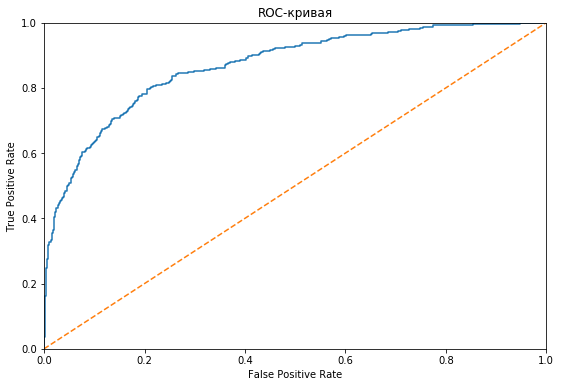

In [278]:
fpr, tpr, threshholds = roc_curve(target_test, probabilites_one_test)
plt.figure(figsize=(9, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

Определим какие параметры сильнее влияют на то, уйдет ли клиент из банка или нет.

In [279]:
feature_importances = pd.Series(np.round(forest.feature_importances_, 3), index=features.columns)
feature_importances.sort_values(ascending=False)

Age                  0.400
NumOfProducts        0.241
Balance              0.088
IsActiveMember       0.073
Geography_Germany    0.055
CreditScore          0.043
EstimatedSalary      0.041
Gender_Male          0.026
Tenure               0.022
Geography_Spain      0.006
HasCrCard            0.005
dtype: float64

### Вывод

Модель прошла тестирование на тестовых данных и показала себя даже немного лучше чем на валидационной выборке. Модель хорошо научилась предсказывать уйдет клиент или нет. Сильнее всего на вероятность ухода клиента из банка влияет возраст, количество продуктов банка и баланс, а слабее всего наличие кредитной карты.